In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error,r2_score

In [7]:
prices = pd.read_csv('AvocadoV.csv').drop(['Unnamed: 0'],axis = 1)

In [8]:
prices['Date'] = pd.to_datetime(prices['Date'])

In [9]:
prices.head(5)

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [10]:
prices = prices.drop(['4046','4225','4770','Large Bags','Small Bags','XLarge Bags','Total Volume'],axis=1)

In [11]:
US = prices.loc[(prices['region']) == 'TotalUS']  
US.head(5)

,Date,AveragePrice,Total Bags,type,year,region
2652,2015-12-27,0.95,6288852.44,conventional,2015,TotalUS
2653,2015-12-20,0.98,5842743.55,conventional,2015,TotalUS
2654,2015-12-13,0.93,6364279.64,conventional,2015,TotalUS
2655,2015-12-06,0.89,6302262.96,conventional,2015,TotalUS
2656,2015-11-29,0.99,4789009.00,conventional,2015,TotalUS


C:\Users\Ijas\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Total Bags', ylabel='AveragePrice'>

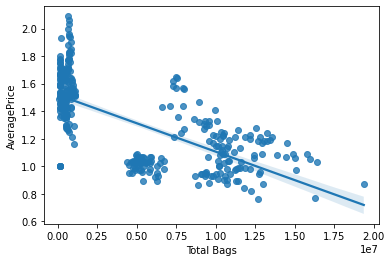

In [12]:
sns.regplot(US['Total Bags'],US['AveragePrice'])

In [13]:
training_data,testing_data = train_test_split(US,train_size = 0.80,random_state = 35)

In [14]:
reg = linear_model.LinearRegression()

X_train,Y_train = pd.DataFrame(training_data['Total Bags']),training_data['AveragePrice']

In [15]:
model = reg.fit(X_train,Y_train)

In [16]:
X_test,Y_test = pd.DataFrame(testing_data['Total Bags']),testing_data['AveragePrice']

pred = model.predict(X_test)

In [17]:
mean_squared_error(Y_test,pred)

0.052710838323440506

In [18]:
r2_score(Y_test,pred)

0.47772436066272383

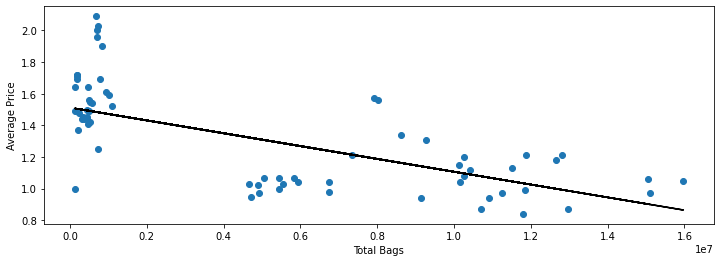

In [20]:
plt.figure(figsize=(12,4))

plt.scatter(X_test,Y_test)
plt.plot(X_test,pred,color = 'black')
plt.ylabel("Average Price")
plt.xlabel("Total Bags")
plt.show()